In [37]:
# Pyber Ride Sharing
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import seaborn as sns

# Read in city data
city_path = os.path.join('raw_data', 'city_data.csv')
city = pd.read_csv(city_path)
# Read in ride data
ride_path = os.path.join('raw_data', 'ride_data.csv')
ride = pd.read_csv(ride_path)

# Get total driver count
total_driver_count = city['driver_count'].sum()

# Merge city with driver data
city_data = pd.merge(city, ride, how='inner', on='city')

# Sort by type and arrange columns
city_data = city_data.sort_values(['type'])
city_data = city_data.reset_index()
city_data = city_data[['city','date','fare','ride_id','driver_count', 'type']]

city_data.head()

,city,date,fare,ride_id,driver_count,type
0,West Kevintown,2016-02-10 00:50:04,34.69,9595491362610,5,Rural
1,Jacksonfort,2016-11-15 18:10:42,34.73,2872259802463,6,Rural
2,Jacksonfort,2016-06-09 23:01:40,24.63,978305304720,6,Rural
3,Jacksonfort,2016-10-01 13:41:00,34.17,7750597960630,6,Rural
4,Jacksonfort,2016-10-20 16:42:54,37.75,4356781814784,6,Rural


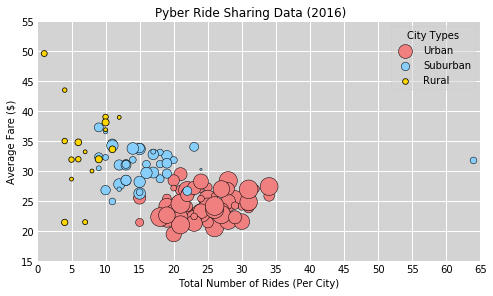

In [38]:
# Split Data into the three types Rural, Suburban, and Urban
rural = city_data[city_data['type'] == 'Rural']
suburban = city_data[city_data['type'] == 'Suburban']
urban = city_data[city_data['type'] == 'Urban']

# Get Rural group by values
r_group_by_city = rural.groupby('city')
r_group_by_city.count()
# Get Rural average fare 
r_avg_fare_by_city = r_group_by_city["fare"].mean()
r_fares = r_avg_fare_by_city.values
# Get Rural rides per city
r_rides_per_city = r_group_by_city["ride_id"].count()
r_rides = r_rides_per_city.values
# Get Rural drivers per city
r_drivers_by_city = r_group_by_city["driver_count"].mean()
r_drivers = r_drivers_by_city.values

# Get Suburban group by values
s_group_by_city = suburban.groupby('city')
s_group_by_city.count()
# Get Suburban average fare 
s_avg_fare_by_city = s_group_by_city["fare"].mean()
s_fares = s_avg_fare_by_city.values
# Get Suburban rides per city
s_rides_per_city = s_group_by_city["ride_id"].count()
s_rides = s_rides_per_city.values
# Get Suburban drivers per city
s_drivers_by_city = s_group_by_city["driver_count"].mean()
s_drivers = s_drivers_by_city.values

# Get Urban group by values
u_group_by_city = urban.groupby('city')
u_group_by_city.count()
# Get Urban average fare 
u_avg_fare_by_city = u_group_by_city["fare"].mean()
u_fares = u_avg_fare_by_city.values
# Get Urban rides per city
u_rides_per_city = u_group_by_city["ride_id"].count()
u_rides = u_rides_per_city.values
# Get Urban drivers per city
u_drivers_by_city = u_group_by_city["driver_count"].mean()
u_drivers = u_drivers_by_city.values

# Use subplots to graph all three scatter plots onto one chart
fig, ax = plt.subplots()

fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=12)
fig.tight_layout() # remove space between header and title
fig.subplots_adjust(top=.93) # adjust so title is just above chart
fig.set_size_inches(7,4)

ax.set_xlim(0,65,5)
ax.set_ylim(15,55,5)

ax.scatter(u_rides, u_fares, s=u_drivers*5, c ='lightcoral', edgecolors="black", linewidth=.5, label="Urban")
ax.scatter(s_rides, s_fares, s=s_drivers*5, c = 'lightskyblue', edgecolors="black", linewidth=.5, label="Suburban")
ax.scatter(r_rides, r_fares, s=r_drivers*5, c = 'Gold', edgecolors="black", linewidth=.75, label="Rural")

ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

ax.legend(title='City Types', facecolor='lightgray', framealpha=0.5, fancybox=True) # set legend background to transparent
ax.xaxis.grid(color='white', linestyle='solid', linewidth=1)
ax.yaxis.grid(color='white', linestyle='solid', linewidth=1)
ax.set_axisbelow(True) # show plots on top of grid lines

ax.set_facecolor('lightgray')

ax.tick_params(axis=u'both', which=u'both',length=0) # hide tick marks still show lables
ax.xaxis.set_ticks(np.arange(0, 67, 5)) # set x axis's tick mark increment to 5 show last lable 65
sns.despine(left=True, bottom=True, right=True) # remove border around chart 
fig.savefig('scatter.png')
plt.show()

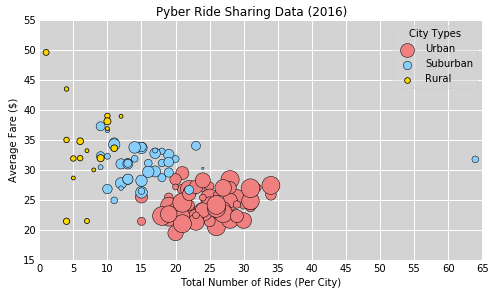

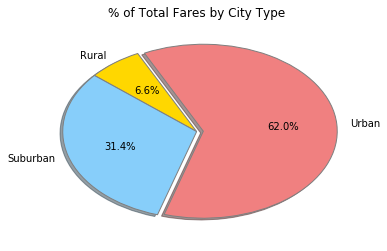

In [39]:
# PIE CHART: % of Total Fares by City Type
# Sum up total fares
total_fares = city_data['fare'] 
total_fares = total_fares.sum()

# Get fare amounts per type
total_rural_fares = city_data.loc[city_data['type'] == 'Rural']
total_rural_fares = total_rural_fares["fare"].sum()
total_sub_fares = city_data.loc[city_data['type'] == 'Suburban']
total_sub_fares = total_sub_fares["fare"].sum()
total_urban_fares = city_data.loc[city_data['type'] == 'Urban']
total_urban_fares = total_urban_fares["fare"].sum()

# Calculate percentages of type fare totals with total fares
rural_pct_of_fares = (total_rural_fares/total_fares) * 100
sub_pct_of_fares = (total_sub_fares/total_fares) * 100
urban_pct_of_fares = (total_urban_fares/total_fares) * 100

# Set up pie chart properties with labels, percentages and colors
labels = ['Urban','Rural','Suburban']
fracs = [urban_pct_of_fares, rural_pct_of_fares, sub_pct_of_fares,]
explode = (0.05, 0, 0)
colors = ('lightcoral', 'gold','lightskyblue')

# Plot pie chart including explode, shadow, startangle and wedgeprops distinctions 
plt.pie(fracs, 
        labels=labels, 
        explode=explode, 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=colors,
        startangle=253,
        wedgeprops={'edgecolor':'grey','linewidth': 1, 'linestyle': 'solid', 'antialiased': True} )
plt.title('% of Total Fares by City Type')
plt.show()

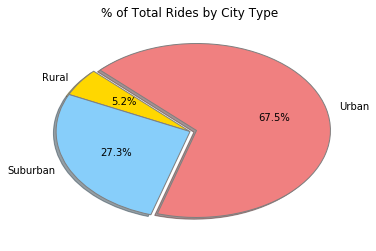

In [40]:
# PIE CHART: % of Total Rides by City Type
# Count up total riders
total_riders = city_data['ride_id'].count()

# Get rider counts per type
total_rural_riders = len(rural)
total_sub_riders = len(suburban)
total_urban_riders = len(urban)

# Calculate percentages of type rider counts with total riders count
rural_pct_of_riders = (total_rural_riders/total_riders) * 100
sub_pct_of_riders = (total_sub_riders/total_riders) * 100
urban_pct_of_riders = (total_urban_riders/total_riders) * 100

# Set up pie chart properties with labels, percentages and colors
labels = ['Urban','Rural','Suburban', ]
fracs = [urban_pct_of_riders, rural_pct_of_riders, sub_pct_of_riders, ]
explode = (0.05,0, 0)
colors = ('lightcoral', 'gold','lightskyblue')

# Plot pie chart including explode, shadow, startangle and wedgeprops distinctions
plt.pie(fracs, 
        labels=labels, 
        explode=explode, 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=colors,
        startangle=253,
        wedgeprops={'edgecolor':'grey','linewidth': 1, 'linestyle': 'solid', 'antialiased': True} )
plt.title('% of Total Rides by City Type')
plt.show()


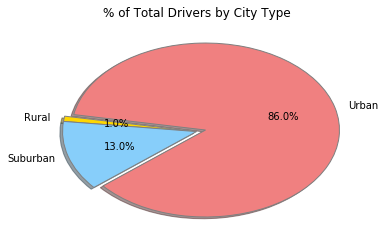

In [41]:
# PIE CHART: % of Total Drivers by City Type
# Sum up total drivers from only city 
total_driver_count = city['driver_count'].sum()

# Select and sum drivers per type
total_rural_drivers = city_data.loc[city_data['type'] == 'Rural']
total_rural_drivers = total_rural_drivers["driver_count"].sum()
total_sub_drivers = city_data.loc[city_data['type'] == 'Suburban']
total_sub_drivers = total_sub_drivers["driver_count"].sum()
total_urban_drivers = city_data.loc[city_data['type'] == 'Urban']
total_urban_drivers = total_urban_drivers["driver_count"].sum()

# Calculate percentages of type drivers with total drivers
rural_pct_of_drivers = (total_rural_drivers/total_driver_count) * 100
sub_pct_of_drivers = (total_sub_drivers/total_driver_count) * 100
urban_pct_of_drivers = (total_urban_drivers/total_driver_count) * 100

# Set up pie chart properties with labels, percentages and colors
labels = ['Urban','Rural','Suburban', ]
fracs = [urban_pct_of_drivers, rural_pct_of_drivers, sub_pct_of_drivers, ]
explode = (0.07,0, 0)
colors = ('lightcoral', 'gold','lightskyblue')

# Plot pie chart including explode, shadow, startangle and wedgeprops distinctions
plt.pie(fracs, 
        labels=labels, 
        explode=explode, 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=colors,
        startangle=220,
        wedgeprops={'edgecolor':'grey','linewidth': 1, 'linestyle': 'solid', 'antialiased': True} )
plt.title('% of Total Drivers by City Type')
plt.show()